# COGS 108 - The Effect of Different Variables on Rideshare Prices

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

In this project, we analyzed a dataset containing rideshare information for Uber and Lyft in Boston, Massachussetts in a given week. With the different variables in the dataset, our goal was to determine if there are any significant relationships between variables and the price of each ride. While it may seem that there are obvious factors that contribute to the pricing, we aimed to see if those "obvious" indicators truly are influential, and if there are others that might prove to be more useful. After careful analysis, we concluded that overall, distance was the only truly significant variable in determining price. While there were many other factors that might have seemed useful, like temperature and rain, these features did not yield significant improvement.

# Names

- Hien Bui
- Felicia Chan
- Samantha Lin
- Jason Lee

<a id='research_question'></a>
# Research Question

How does distance, the time of day, and climate, specifically weather and  temperature affect the prices of Uber and Lyft rides in Boston’s hotspots? Additionally, how can we utilize these variables to predict the prices of Uber and Lyft rides in Boston’s hotspots?

# Background & Prior Work

Traditional transportation services like taxis have existed for decades. However, digital advancements have led to the rise of transportation services that can be booked and tracked digitally. Uber and Lyft are both companies that provide mobility as a service (MaaS), allowing users to plan and book transportation services through. Users can request rides from drivers on the Uber or Lyft app, the time of arrival is estimated and displayed, and customers can even rate the quality of the ride afterwards. Ride fares are then charged to the user’s preferred payment method. If you’ve ever used either of these services multiple times, you can see that your fare can change with each ride. Since the pricing of the ride is automatically calculated based on a number of different factors such as location, time, distance, etc., this leads to wildly varying prices. Our team aims to understand these different factors to predict the price of the fares. 

Some prior work researched include the paper “Modeling and Analysis of Uber’s Rider Pricing”, where researchers use the Uber API to gather real-time operational data. They analyzed the data of a number of different factors–including location, distance, and weather as mentioned previously– and calculated the impact and importance of those factors on ride payments. Similar findings about Uber and Lyft data are presented in some other GitHub projects. In a GitHub project by user alfafimel, the team seeks to use Uber and Lyft data to understand trip prices, perform exploratory data analysis, and create data visualizations.

**References & Sources:**  
https://github.com/alfafimel/PREDICTION-OF-CAB-PRICES-UBER-LYFT-
https://www.researchgate.net/publication/338438722_Modeling_and_Analysis_of_Uber%27s_Rider_Pricing
https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices
https://www.google.com/maps/d/u/0/viewer?mid=1CoeBbhbf59z8EopJGvMJxEe1NNo&ll=42.45357621635435%2C-71.21848534999998&z=10

# Hypothesis

We hypothesize that colder temperatures, rain/snow and peak hours will have a positive correlation with the prices of Uber and Lyft rides in Boston’s hotspots. This is because we believe there would be a higher demand for rides under these conditions. We also predict that there will be a positive correlation between distance and the prices of Uber and Lyft rides in Boston’s hotspots.

# Dataset(s)

# Cabs

- Dataset name: cab_rides.csv
- Link to the dataset: https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices?select=cab_rides.csv 
- Number of Observations: 693071

The cabs_rides dataset contains all Uber and Lyft rides data for approximately a week in November 2018 around the area in Boston. The dataset contains the distance of each ride, the type of cab (Uber/Lyft), when the ride occured (epoch time), the ride destination, the starting location, price of the ride, multiplier to the price of the ride, transaction id, product id, and product name

# Weather

- Dataset name: weather.csv
- Link to the dataset: https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices?select=cab_rides.csv 
- Number of Observations: 6276

The weather dataset contains the weather conditions of the most popular areas in Boston. The dataset contains the temperature in Farenheit for each location, the location name, cloud visibility, atmospheric pressure in mb, rain in inches for the last hour, time when the observation was recorded (epoch time), humidity in %, and wind speed in mph.

Our plan is to join the weather dataset into the cab_rides dataset based on the destination column from cab_rides dataset and the location column of the weathers_dataset. However, there are timestamps columns for both the cab_rides and weather dataset, so we will use those as keys as well to accurately provide the conditions of the destination when joining the weather dataset to the cab_rides dataset. 

# Setup

In [29]:
# import modules
import pandas as pd
import numpy as np
import datetime
import time
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [30]:
# reading the datasets
cabs = pd.read_csv('data/cab_rides.csv')
weathers = pd.read_csv('data/weather.csv')

# Data Cleaning

#### Dropping Null Values

In [31]:
# drop observations that contains null values and resetting the index
cabs = cabs.dropna().reset_index(drop=True)
weathers = weathers.dropna().reset_index(drop=True)
cabs.shape, weathers.shape

((637976, 10), (894, 8))

In [32]:
# checking types for columns
cabs.dtypes

distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

In [33]:
weathers.dtypes

temp          float64
location       object
clouds        float64
pressure      float64
rain          float64
time_stamp      int64
humidity      float64
wind          float64
dtype: object

#### Converting Time Stamp Column

In [34]:
# since epoch time is in miliseconds for cabs dataset, convert to seconds first and then to datetime 
cabs['time_stamp'] = cabs['time_stamp'].apply(lambda x: x/1000.0)
cabs['time_stamp'] = cabs['time_stamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%c'))

weathers['time_stamp'] = weathers['time_stamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%c'))

In [35]:
cabs.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,Sun Dec 16 01:30:07 2018,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,Mon Nov 26 18:00:23 2018,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,Tue Nov 27 17:00:22 2018,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,Thu Nov 29 20:53:02 2018,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,Wed Nov 28 19:49:20 2018,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [36]:
weathers.head(5)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,Sun Dec 16 15:45:01 2018,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,Sun Dec 16 15:45:01 2018,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,Sun Dec 16 15:45:01 2018,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,Sun Dec 16 15:45:01 2018,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,Sun Dec 16 15:45:01 2018,0.75,11.49


Now that the time_stamp column has been cleaned and converted, we can merge the datasets and proceed with further pre-processing

In [37]:
cabs['day_of_week'] = cabs['time_stamp'].apply(lambda x: x.split(' ')[0])
cabs['month'] = cabs['time_stamp'].apply(lambda x: x.split(' ')[1])
cabs['date'] = cabs['time_stamp'].apply(lambda x: x.split(' ')[2])
cabs['time'] = cabs['time_stamp'].apply(lambda x: x.split(' ')[3])
cabs['year'] = cabs['time_stamp'].apply(lambda x: x.split(' ')[4])
cabs['time_of_day'] = cabs['time'].apply(lambda x: 'morning' if int(x.split(':')[0]) < 12 else ('afternoon' if int(x.split(':')[0]) < 5 else 'evening/night'))

weathers['day_of_week'] = weathers['time_stamp'].apply(lambda x: x.split(' ')[0])
weathers['month'] = weathers['time_stamp'].apply(lambda x: x.split(' ')[1])
weathers['date'] = weathers['time_stamp'].apply(lambda x: x.split(' ')[2])
weathers['time'] = weathers['time_stamp'].apply(lambda x: x.split(' ')[3])
weathers['year'] = weathers['time_stamp'].apply(lambda x: x.split(' ')[4])
weathers['time_of_day'] = weathers['time'].apply(lambda x: 'morning' if int(x.split(':')[0]) < 12 else ('afternoon' if int(x.split(':')[0]) < 5 else 'evening/night'))


In [38]:
cabs.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,day_of_week,month,date,time,year,time_of_day
0,0.44,Lyft,Sun Dec 16 01:30:07 2018,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,Sun,Dec,16,01:30:07,2018,morning
1,0.44,Lyft,Mon Nov 26 18:00:23 2018,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,Mon,Nov,26,18:00:23,2018,evening/night
2,0.44,Lyft,Tue Nov 27 17:00:22 2018,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,Tue,Nov,27,17:00:22,2018,evening/night
3,0.44,Lyft,Thu Nov 29 20:53:02 2018,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,Thu,Nov,29,20:53:02,2018,evening/night
4,0.44,Lyft,Wed Nov 28 19:49:20 2018,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,Wed,Nov,28,19:49:20,2018,evening/night


In [39]:
weathers.head(5)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,day_of_week,month,date,time,year,time_of_day
0,42.42,Back Bay,1.0,1012.14,0.1228,Sun Dec 16 15:45:01 2018,0.77,11.25,Sun,Dec,16,15:45:01,2018,evening/night
1,42.43,Beacon Hill,1.0,1012.15,0.1846,Sun Dec 16 15:45:01 2018,0.76,11.32,Sun,Dec,16,15:45:01,2018,evening/night
2,42.50,Boston University,1.0,1012.15,0.1089,Sun Dec 16 15:45:01 2018,0.76,11.07,Sun,Dec,16,15:45:01,2018,evening/night
3,42.11,Fenway,1.0,1012.13,0.0969,Sun Dec 16 15:45:01 2018,0.77,11.09,Sun,Dec,16,15:45:01,2018,evening/night
4,43.13,Financial District,1.0,1012.14,0.1786,Sun Dec 16 15:45:01 2018,0.75,11.49,Sun,Dec,16,15:45:01,2018,evening/night


#### Merging Datasets

In [40]:
df = pd.merge(cabs, weathers, how='inner', 
              left_on=['day_of_week', 'month', 'date', 'time_of_day'], 
              right_on=['day_of_week', 'month', 'date', 'time_of_day']
             )

In [41]:
df['hour'] = df['time_x'].apply(lambda x: x.split(':')[0]).astype(int)

# Data Analysis & Results

#### Distance vs Price

Text(0, 0.5, 'Price ($)')

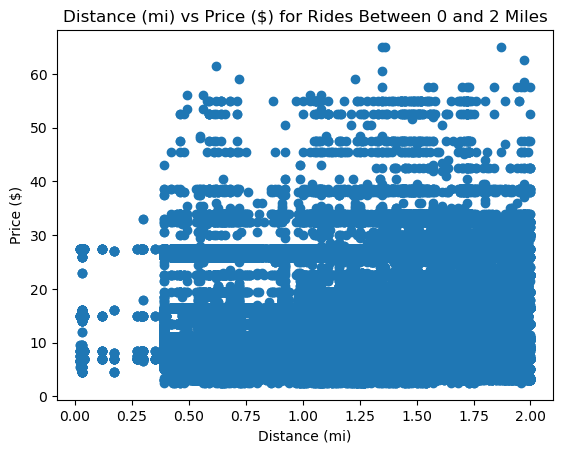

In [14]:
df0_2 = cabs[cabs['distance'] <= 2]
plt.scatter(df0_2['distance'], df0_2['price'])
plt.title('Distance (mi) vs Price ($) for Rides Between 0 and 2 Miles')
plt.xlabel('Distance (mi)')
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

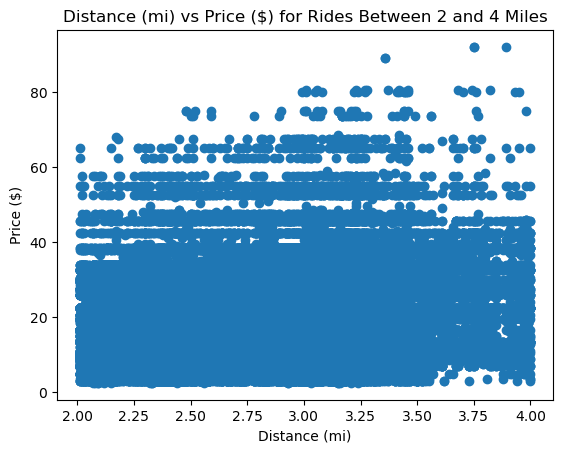

In [15]:
df2_4 = cabs[(cabs['distance'] > 2) & (cabs['distance'] <= 4)]
plt.scatter(df2_4['distance'], df2_4['price'])
plt.title('Distance (mi) vs Price ($) for Rides Between 2 and 4 Miles')
plt.xlabel('Distance (mi)')
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

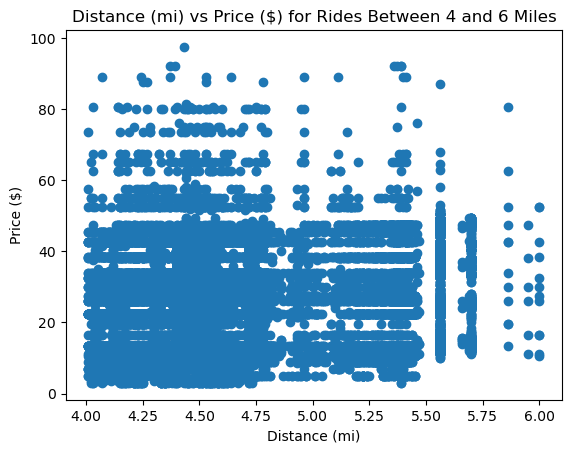

In [16]:
df4_6 = cabs[(cabs['distance'] > 4) & (cabs['distance'] <= 6)]
plt.scatter(df4_6['distance'], df4_6['price'])
plt.title('Distance (mi) vs Price ($) for Rides Between 4 and 6 Miles')
plt.xlabel('Distance (mi)')
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

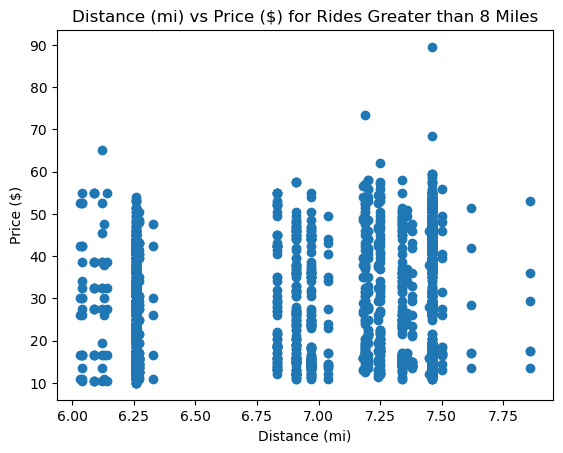

In [17]:
df6_8 = cabs[(cabs['distance'] > 6)]
plt.scatter(df6_8['distance'], df6_8['price'])
plt.title('Distance (mi) vs Price ($) for Rides Greater than 8 Miles')
plt.xlabel('Distance (mi)')
plt.ylabel('Price ($)')

From the graphs above, we can see that distance does not have that much of an influence on price. In this case, we shall look into the other columns to see if other variables have any influence on the price.

#### Distributions
We examine the distribution for each variable that we are interested in.

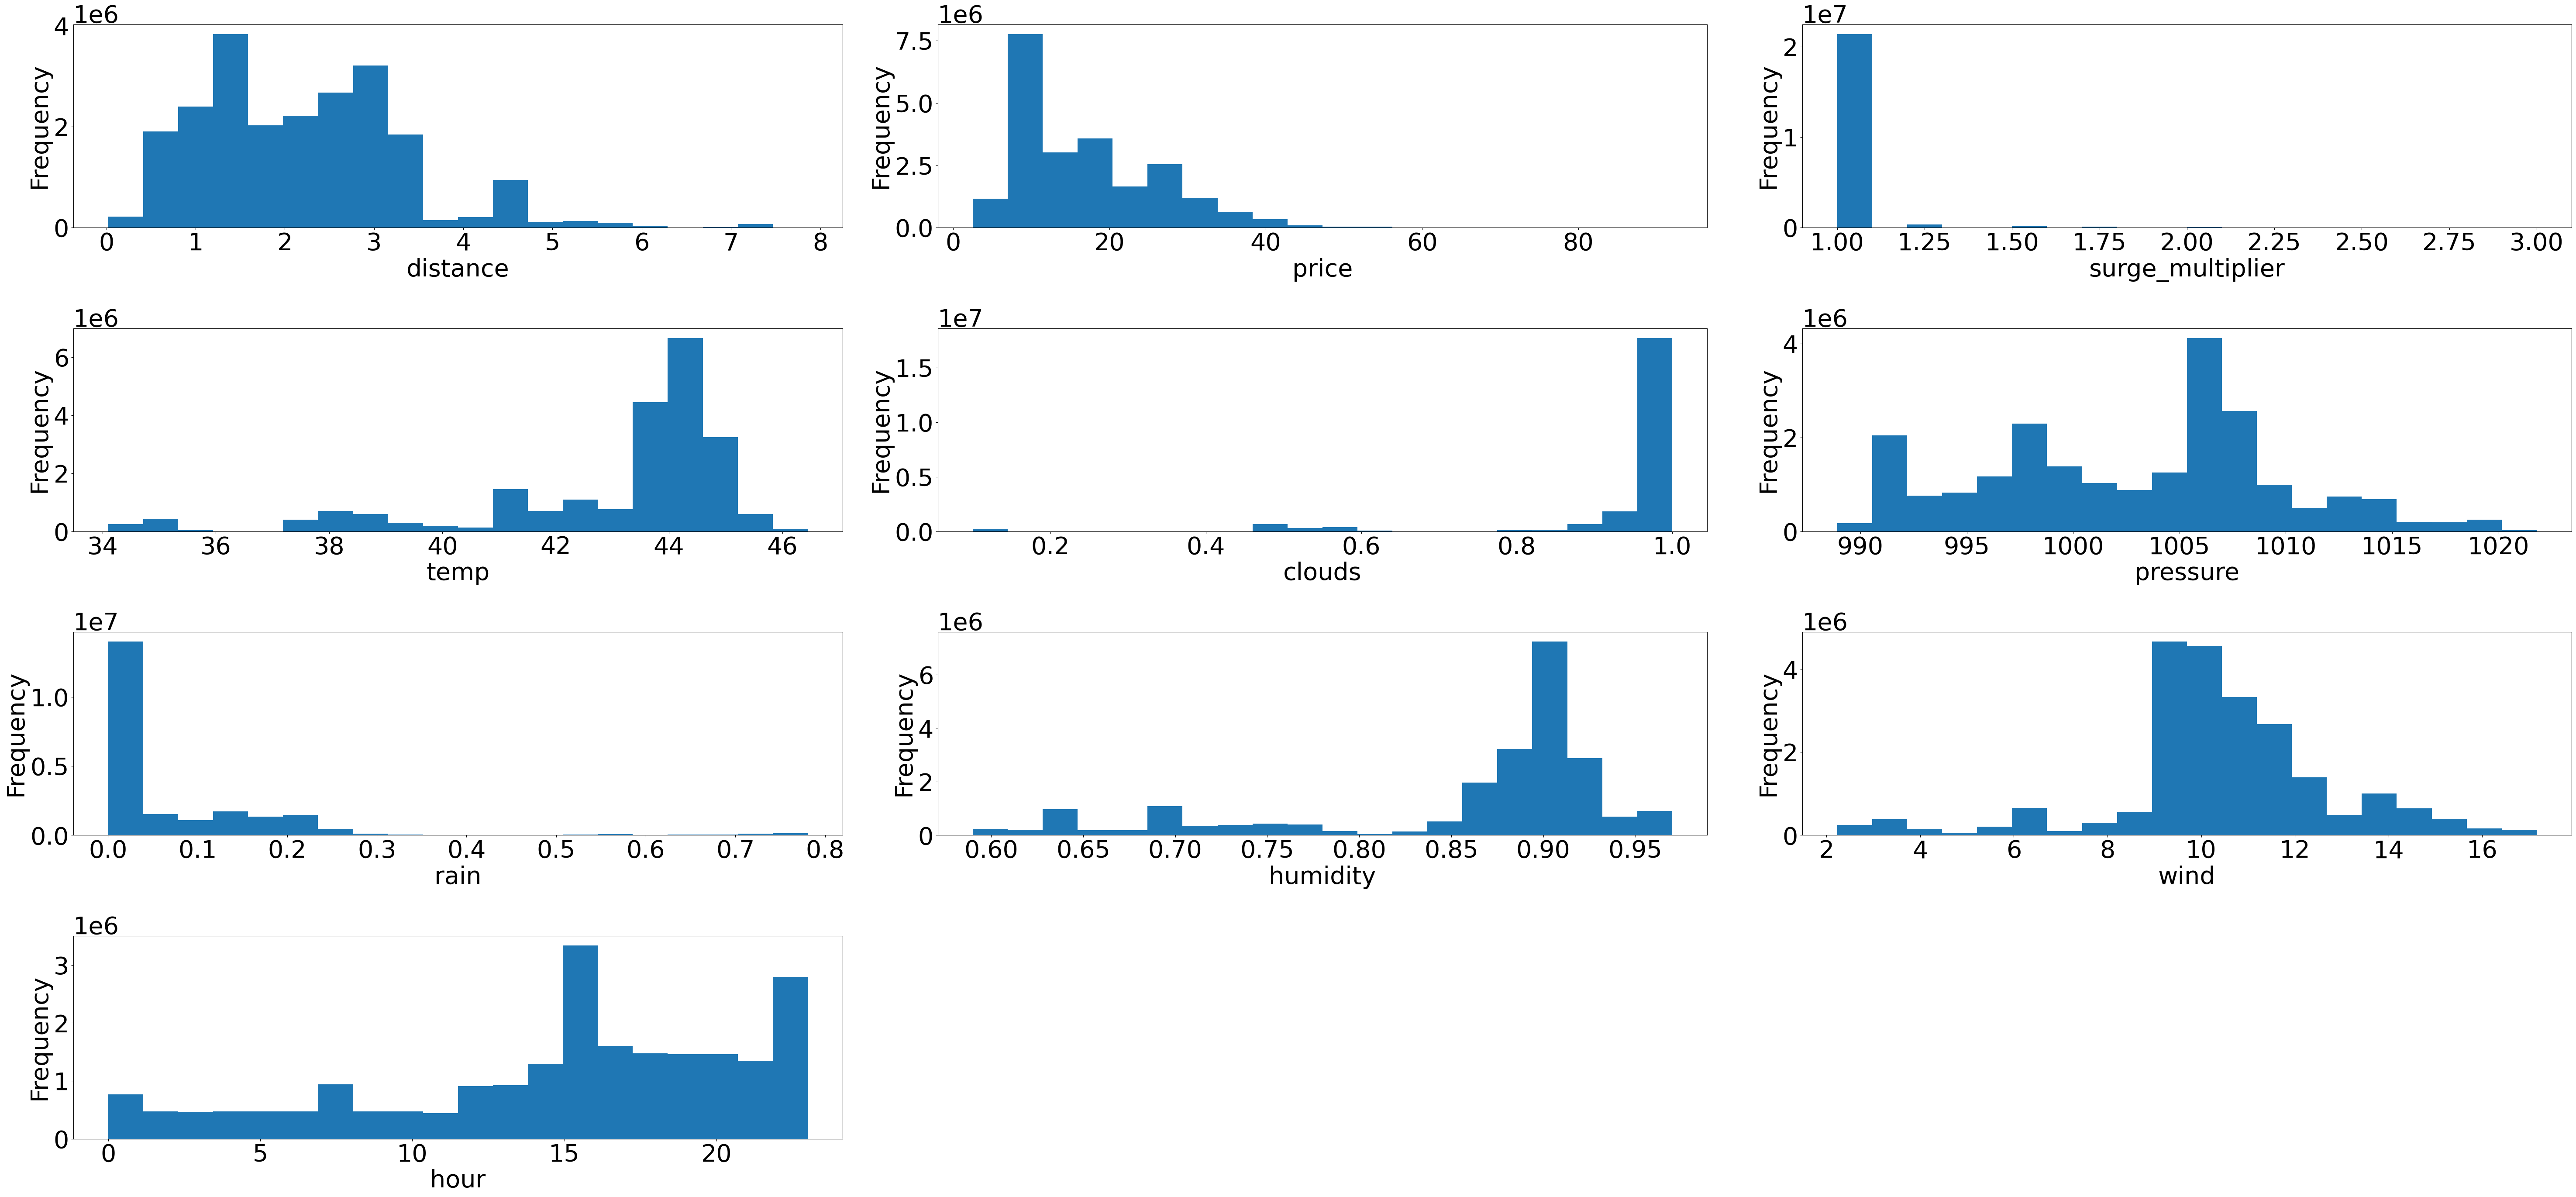

In [18]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 40})
j=1
for column in df.select_dtypes(include='number'):
    plt.subplot(8,3,j)
    plt.hist(df[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    j=j+1


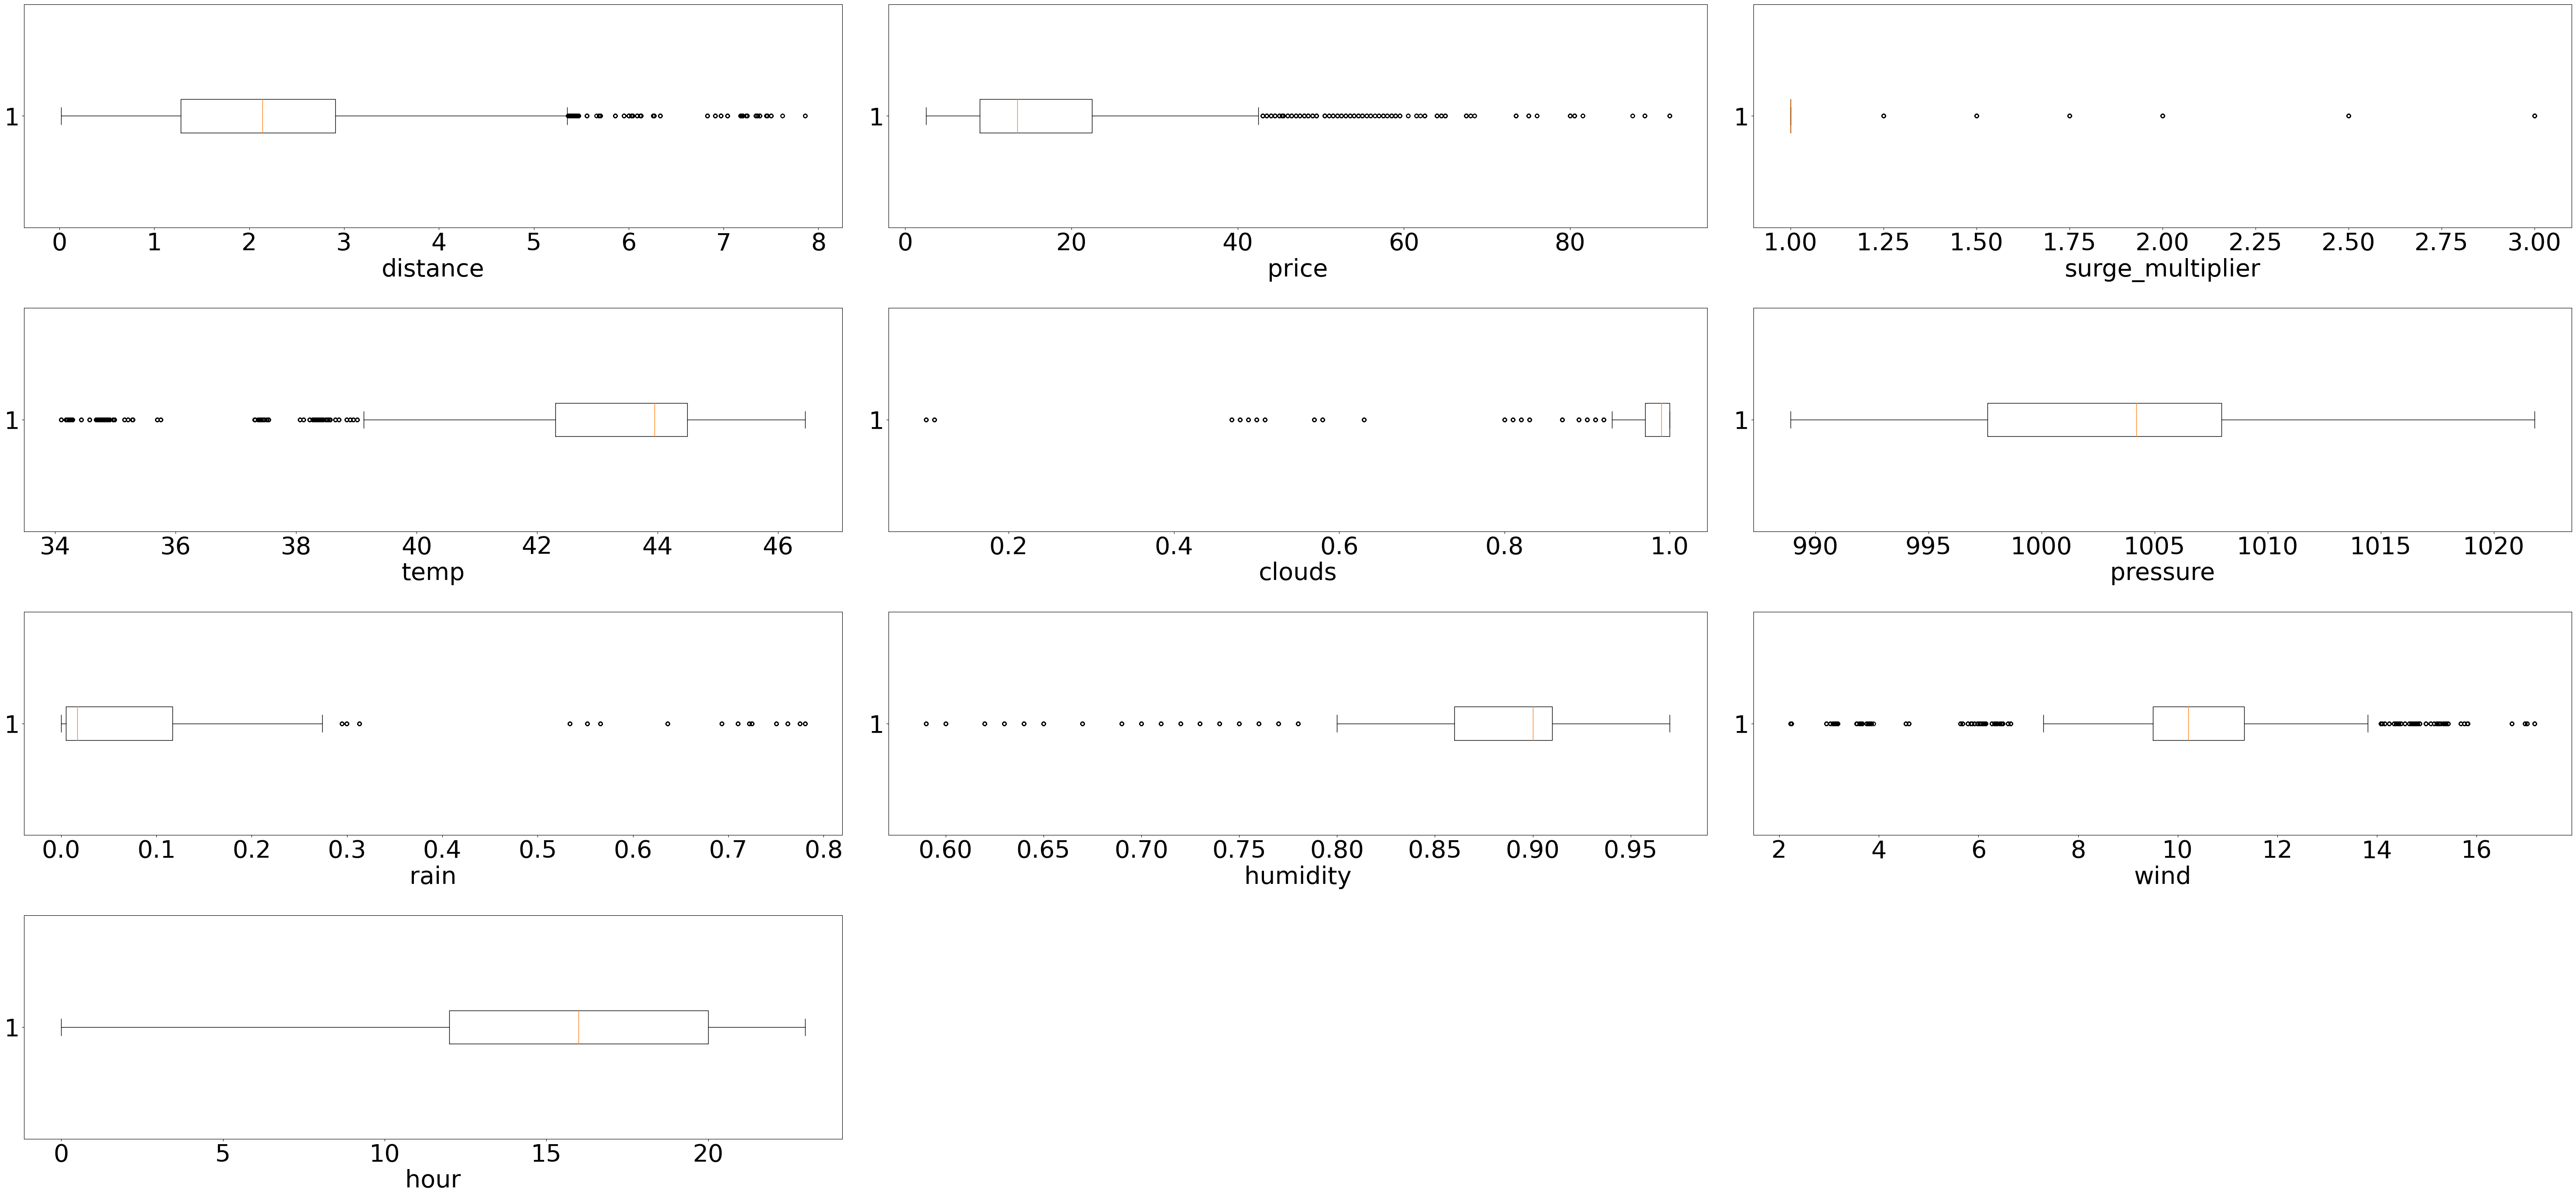

In [19]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 40})
j=1
for column in df.select_dtypes(include='number'):
    plt.subplot(8,3,j)
    plt.boxplot(x=df[column], vert=False)
    plt.xlabel(column)
    plt.tight_layout()
    j=j+1

From the histogram and boxplot, you can tell that there are several outliers in the data for all of the columns except pressure. We decided to perform a log transformation to get a more normal distribution for all of the variables except pressure, hour, and surge_multiplier because pressure and hour seem to be already normal.

In [20]:
# log transformation
for column in df.select_dtypes(include='number'):
    if (column == 'surge_multiplier') or (column == 'pressure'):
        continue
    df[(column+'_10')] = np.log10(df[column])

col_10 = ['price_10','distance_10','surge_multiplier','temp_10','clouds_10','pressure','rain_10','humidity_10','wind_10','hour']

C:\Users\hi3nb\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### Distribution After Log Transformation

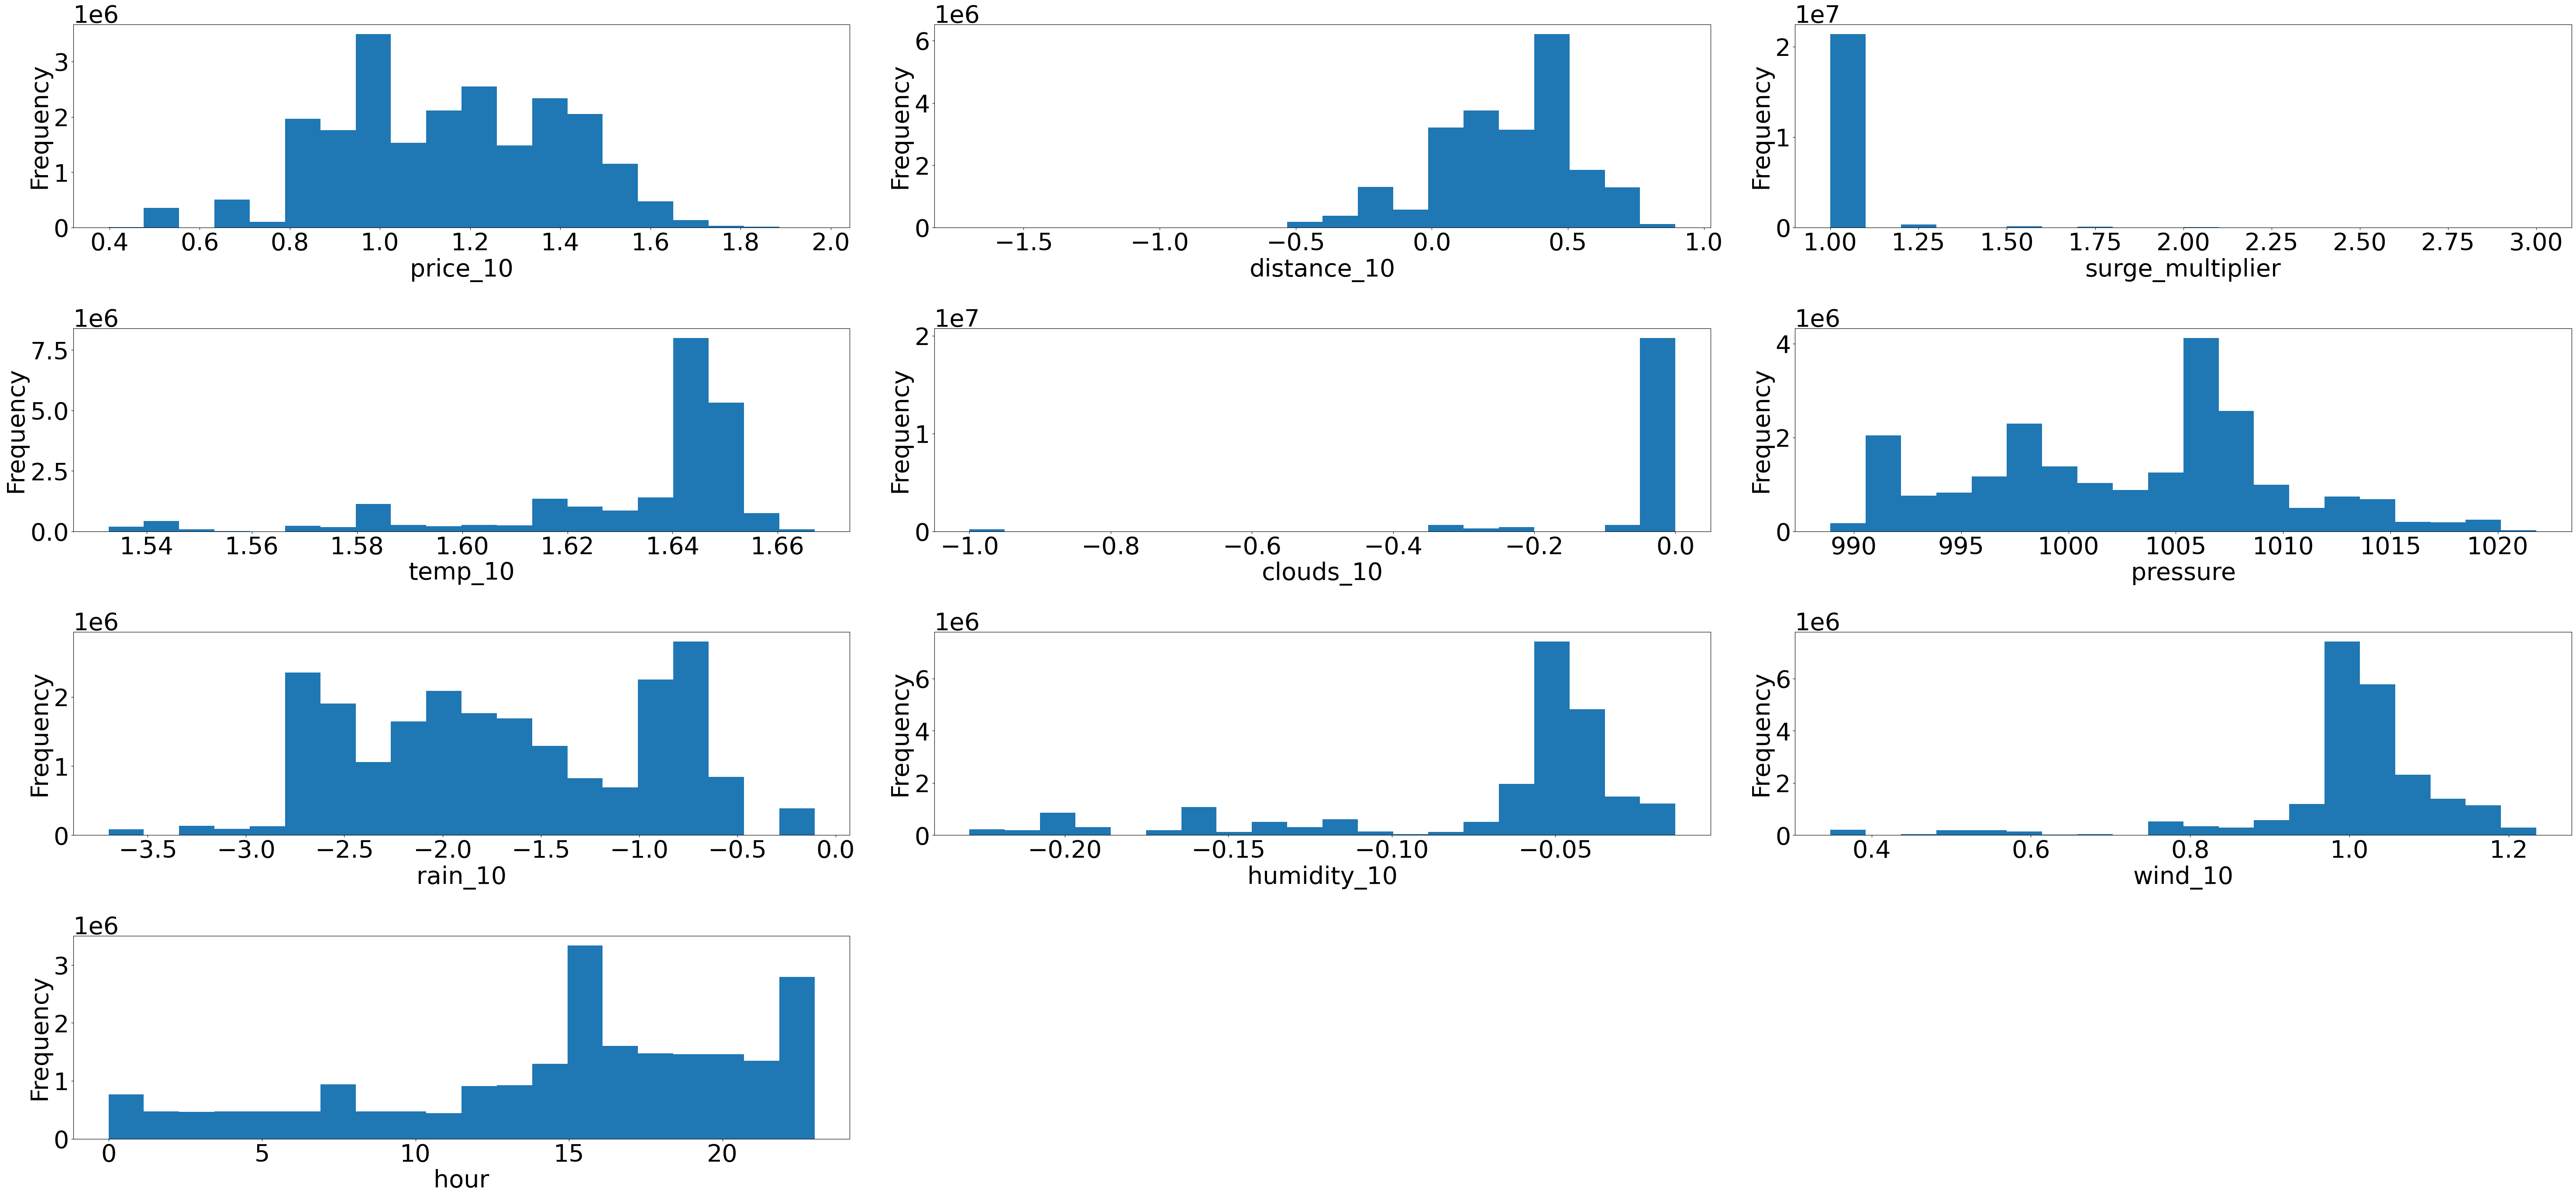

In [21]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 40})
j=1
for column in col_10:
    plt.subplot(8,3,j)
    plt.hist(df[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    j=j+1

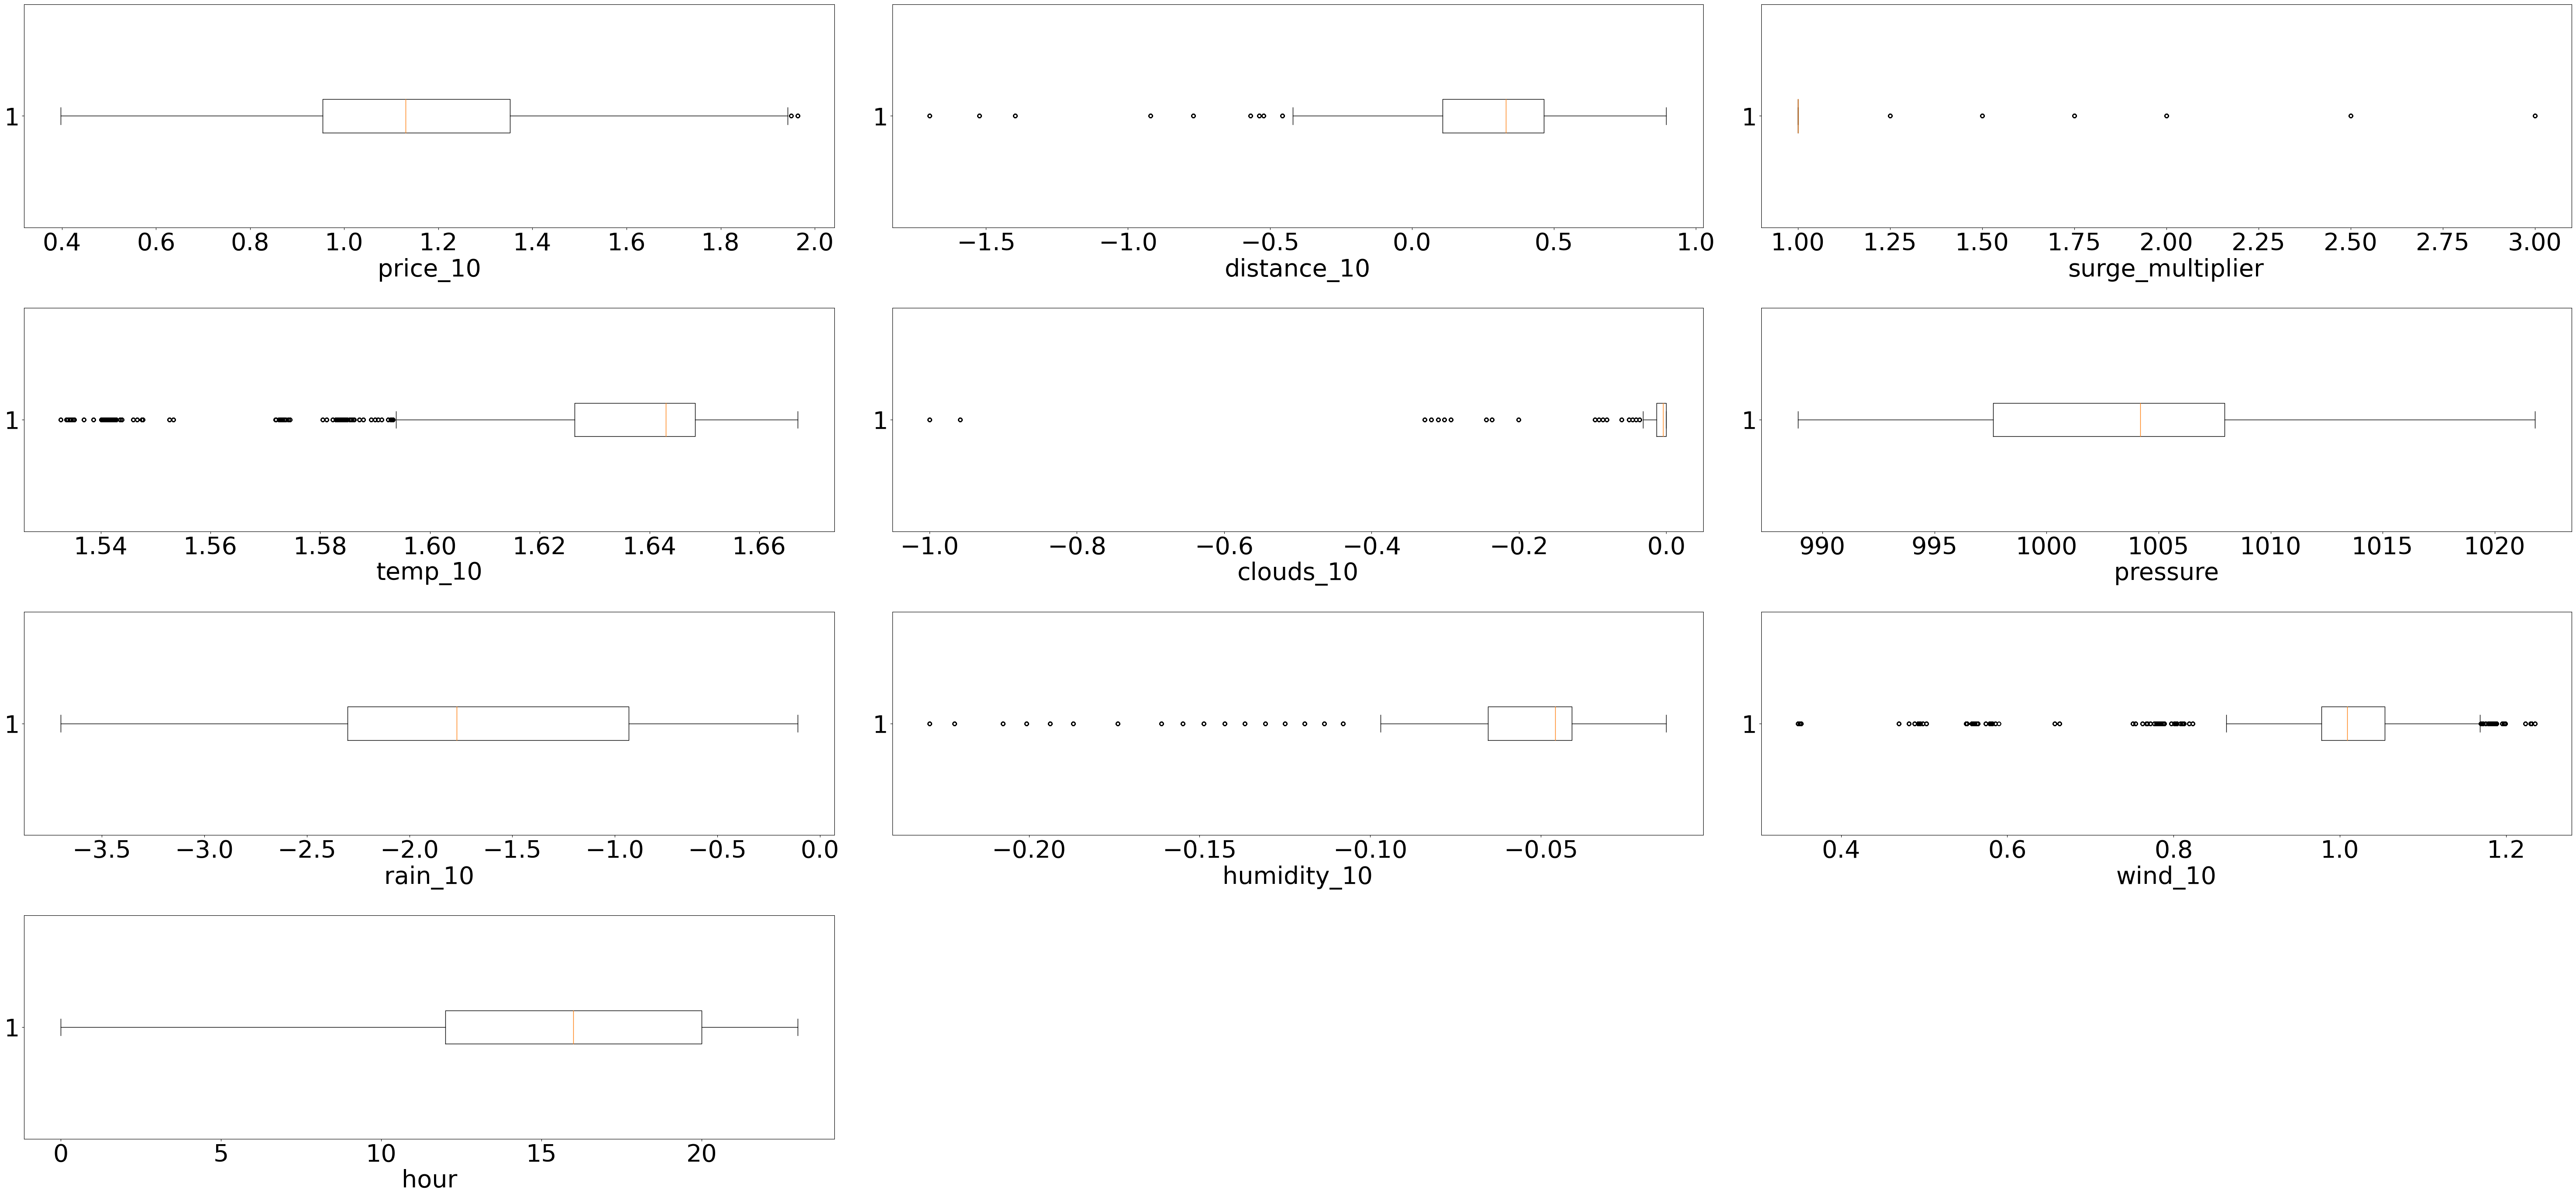

In [22]:
plt.figure(figsize=(60,55))
plt.rcParams.update({'font.size': 40})
j=1
for column in col_10:
    plt.subplot(8,3,j)
    plt.boxplot(x=df[column], vert=False)
    plt.xlabel(column)
    plt.tight_layout()
    j=j+1

Although some of the variables are still not normally distributed, there are fewer outliers compared to before the log transformation.

#### Price for each Cab Type

Text(0, 0.5, 'Average Price ($)')

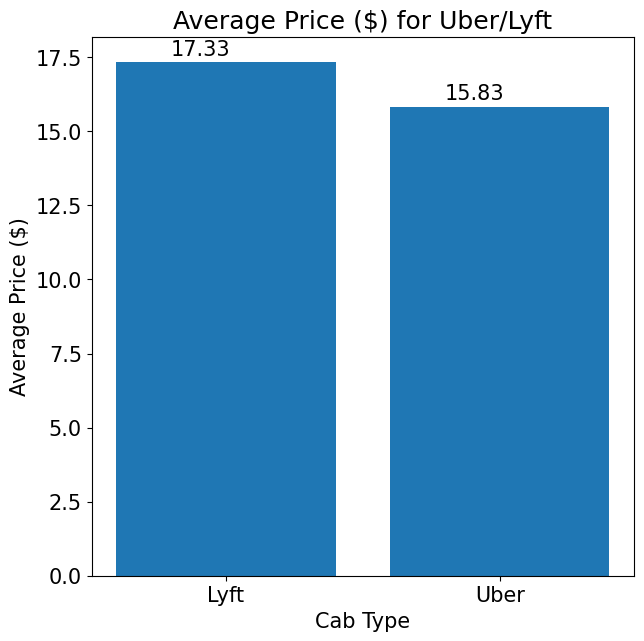

In [23]:
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size': 15})
cab_price = df.groupby('cab_type')['price'].mean()
plt.bar(cab_price.index, cab_price)

for x, y in enumerate(cab_price):
    plt.text(x-0.2, y + .25, str(round(y,2)))

plt.title('Average Price ($) for Uber/Lyft')
plt.xlabel('Cab Type')
plt.ylabel('Average Price ($)')

We compared the average prices for Lyft and Uber rides to determine if there was a difference. On average, Lyft is more expensive by about $1.5.

#### Scatterplot Matrix
We used a scatterplot to examine the relationship between the different variables that are relevent to our research question.

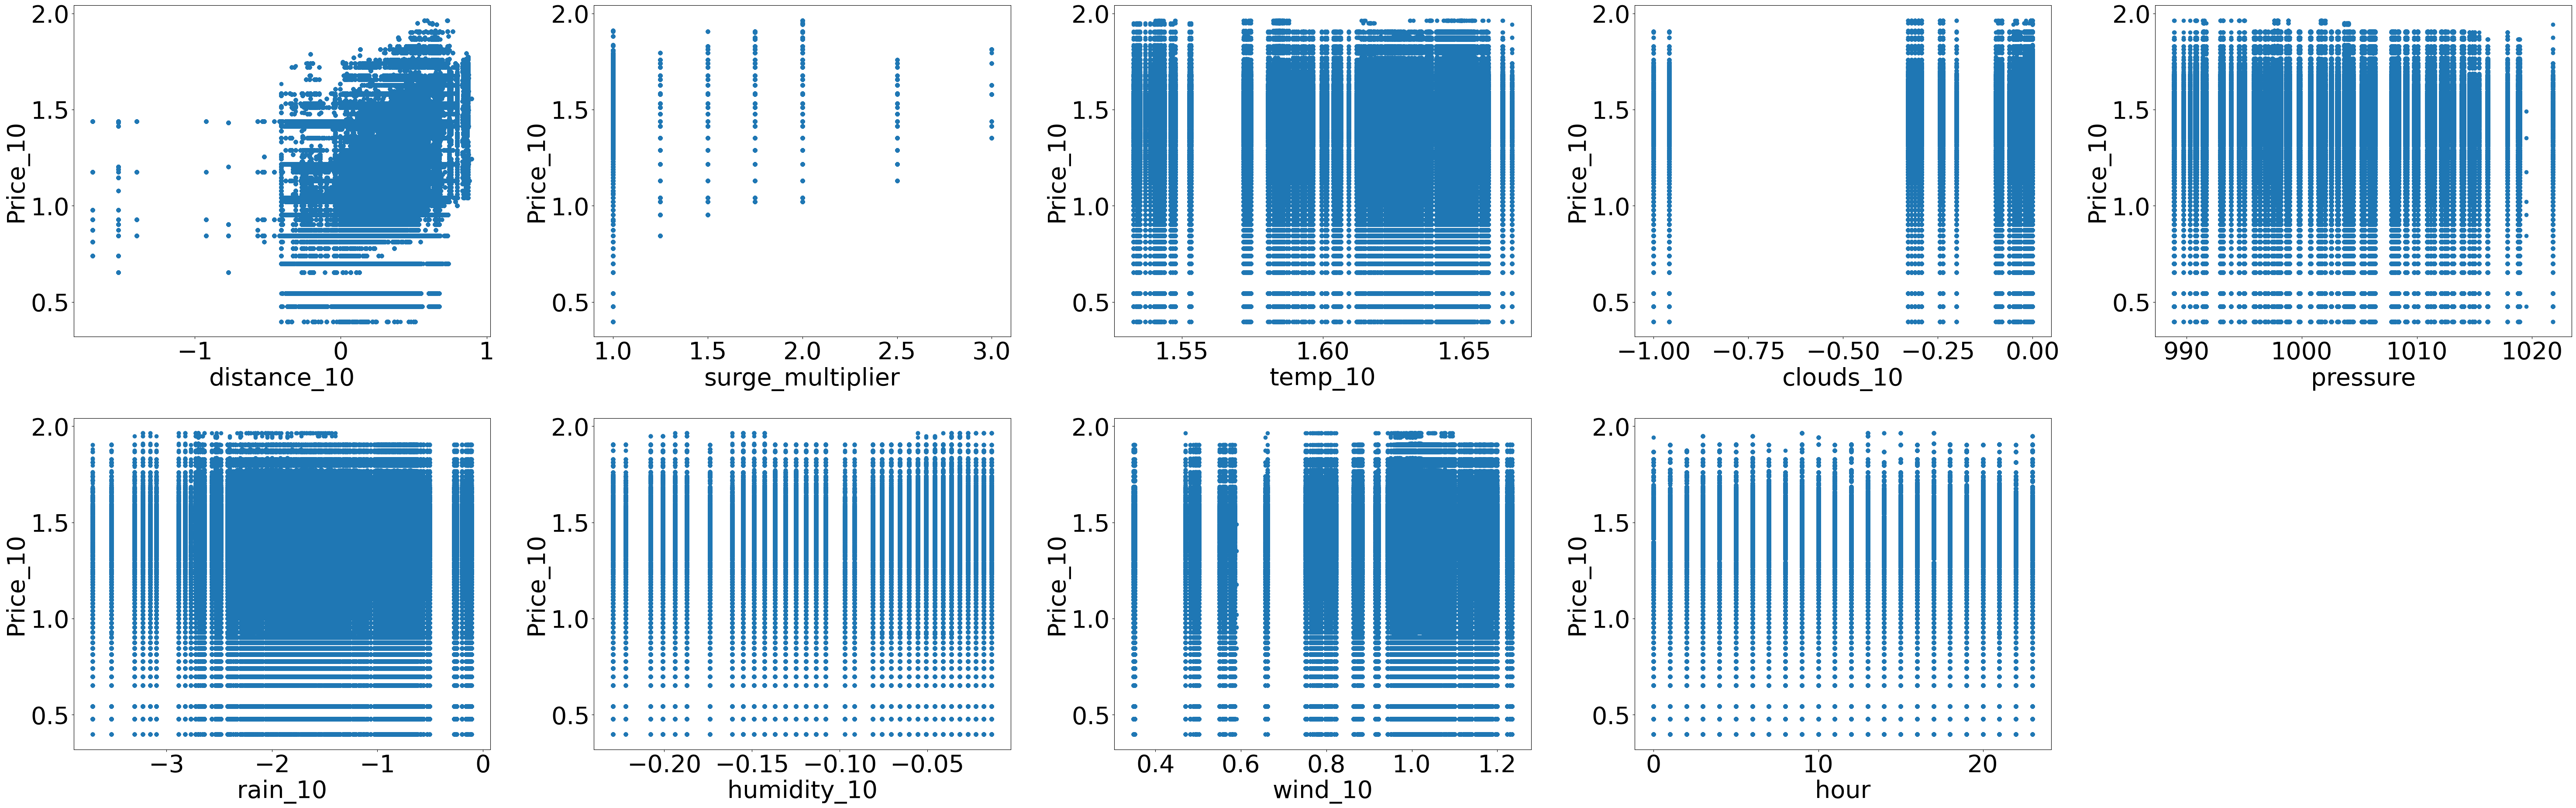

In [24]:
plt.figure(figsize=(60,75))
plt.rcParams.update({'font.size': 40})
j=1
for column in col_10:
    if column=='price_10':
        continue
    else:
        plt.subplot(8,5,j)
        plt.scatter(x=df[column],y=df['price_10'])
        plt.xlabel(column)
        plt.ylabel('Price_10')
        plt.tight_layout()
        j=j+1

From the scatterplot, it looks like there might be a positive correlation between distance and price, and that weather and price don't seem to have a relationship.

#### Correlation Matrix

We want to examine the correlation between the variables that we are interested in to determine what relationships there are within our data.

In [25]:
df_10 = df[col_10]
df_10.head()

,price_10,distance_10,surge_multiplier,temp_10,clouds_10,pressure,rain_10,humidity_10,wind_10,hour
0,0.69897,-0.356547,1.0,1.630733,-0.045757,1018.83,-2.154902,-0.136677,0.987219,1
1,0.69897,-0.356547,1.0,1.626648,-0.036212,1018.90,-1.886057,-0.136677,0.972203,1
2,0.69897,-0.356547,1.0,1.626853,-0.040959,1018.92,-2.096910,-0.136677,0.976350,1
3,0.69897,-0.356547,1.0,1.627161,-0.040959,1018.92,-2.096910,-0.136677,0.977724,1
4,0.69897,-0.356547,1.0,1.626853,-0.036212,1018.90,-2.154902,-0.136677,0.976808,1


Text(0.5, 1.0, 'Correlation Matrix')

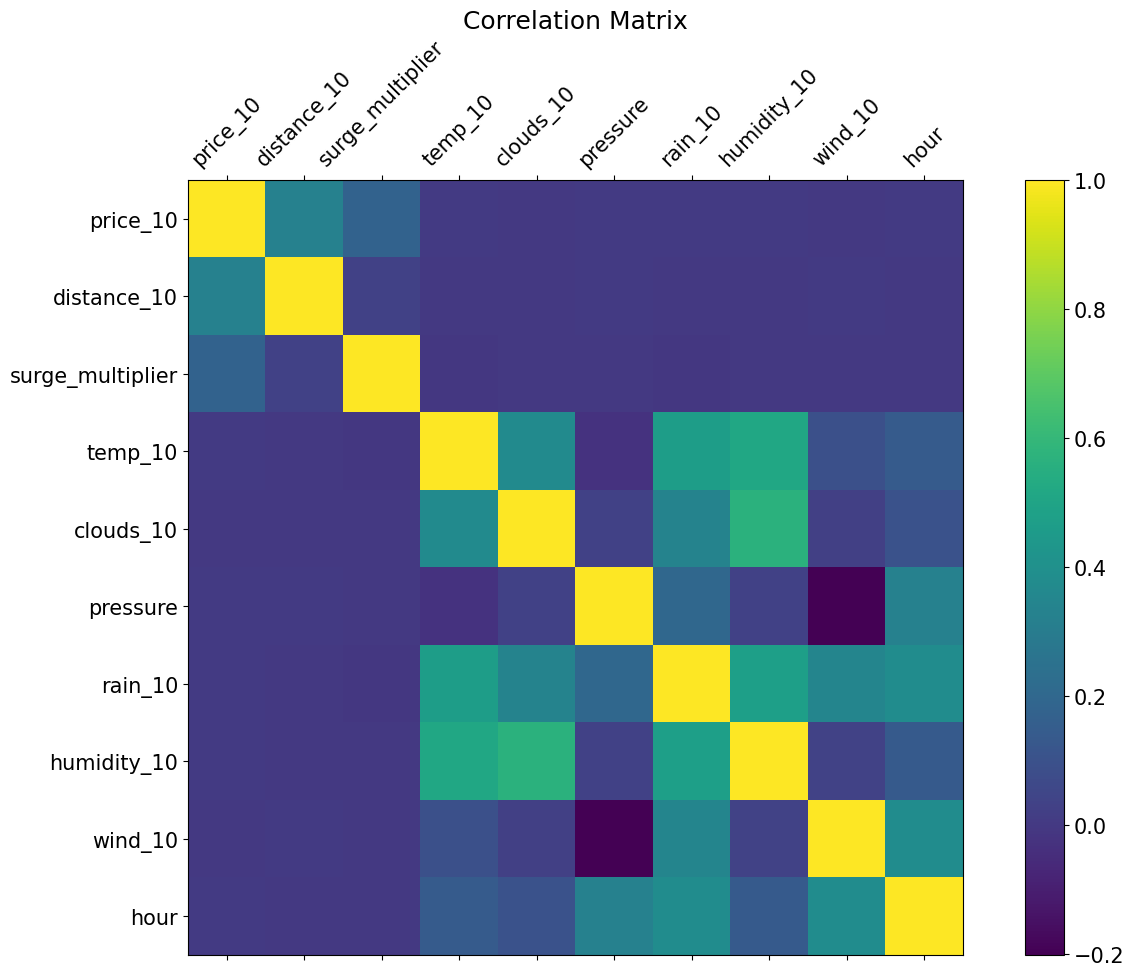

In [26]:
f = plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 15})
plt.matshow(df_10.corr(), fignum=f.number)
plt.xticks(range(df_10.shape[1]), df_10.columns, rotation=45)
plt.yticks(range(df_10.shape[1]), df_10.columns)
plt.colorbar()
plt.title('Correlation Matrix')

Based on the correlation matrix, distance and surge_multiplier seems to be correlated with price, where price and distace have a higher correlation, and the different variables for weather are not correlated with price. This confirms our interpretations that we made from examining the scatterplot.

### Aggregations

#### Average Price (Grouped by Day of Week)

In [27]:
day_price = df.groupby('day_of_week')['price'].mean().reindex(index=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
day_price

day_of_week
Sun    16.526701
Mon    16.546877
Tue    16.550859
Wed    16.537712
Thu    16.550829
Fri    16.543223
Sat    16.530864
Name: price, dtype: float64

Text(0, 0.5, 'Price ($)')

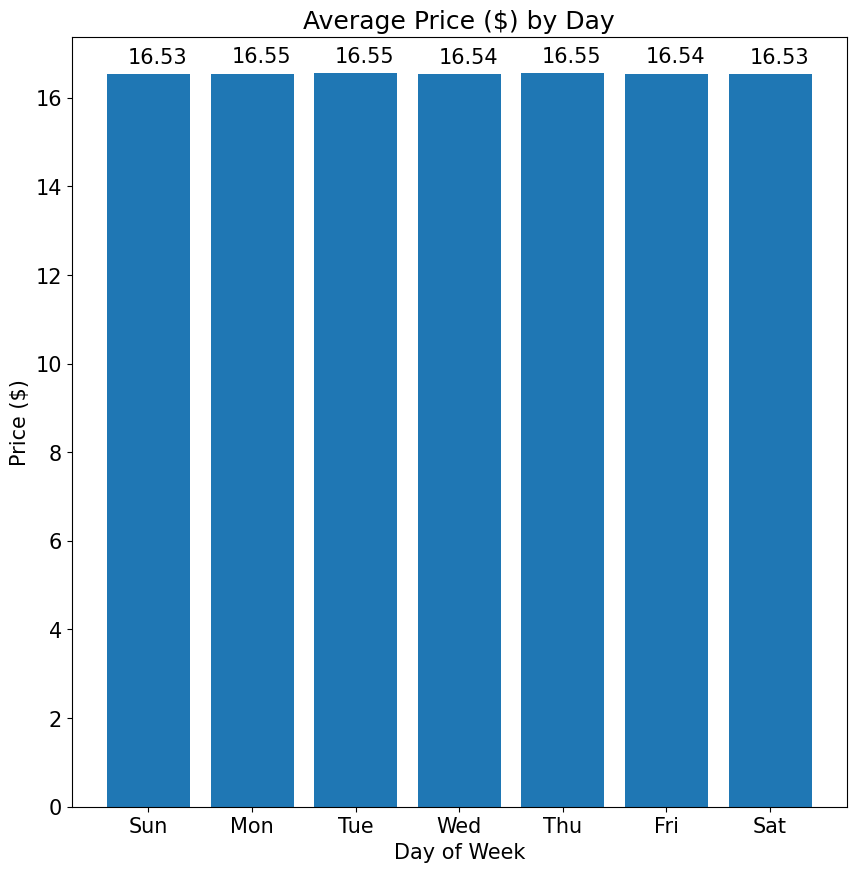

In [28]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 15})
plt.bar(day_price.index, day_price)

for x, y in enumerate(day_price):
    plt.text(x-0.2, y + .25, str(round(y,2)))
    
plt.title('Average Price ($) by Day')
plt.xlabel('Day of Week')
plt.ylabel('Price ($)')

The graph above is a bar chart showing the average rideshare price for each day of the week during the given week. According to the graph, the prices for each day were almost identical, differing by no more than 2 cents for any two days. This is likely due to the fact that the given week was during the holiday season, in which all days are busier and more crowded. 

#### Average Price (Grouped by Destination)

In [29]:
dest_price = df.groupby('destination')['price'].mean()
dest_price

destination
Back Bay                   16.128703
Beacon Hill                16.225753
Boston University          19.126033
Fenway                     18.025458
Financial District         18.130702
Haymarket Square           14.252964
North End                  15.250849
North Station              16.744638
Northeastern University    17.690062
South Station              14.826596
Theatre District           16.058939
West End                   16.138792
Name: price, dtype: float64

Text(0, 0.5, 'Price ($)')

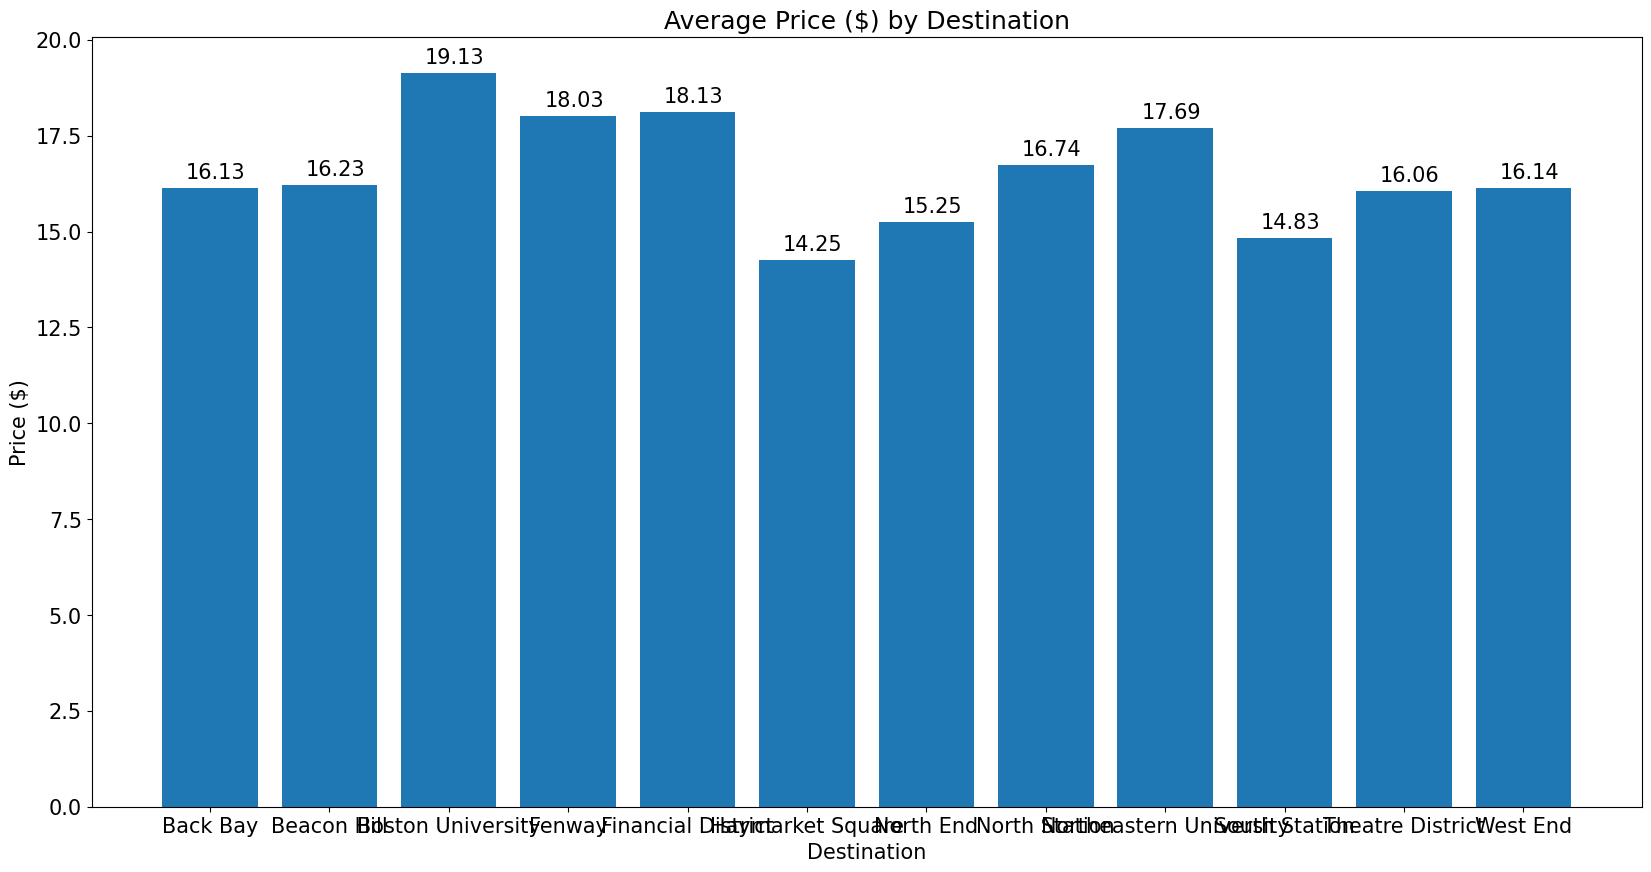

In [30]:
plt.figure(figsize=(20,10))
plt.bar(dest_price.index, dest_price)

for x, y in enumerate(dest_price):
    plt.text(x-0.2, y + .25, str(round(y,2)))
    
plt.title('Average Price ($) by Destination')
plt.xlabel('Destination')
plt.ylabel('Price ($)')

We believed that another potential factor in rideshare pricing could be ride destinations. We theorized that some destinations might be more popular than others, which would lead to more traffic and thus higher pricings. The bar graphs below display the average price of all rides for each destination recorded. It seems that the highest average costing destinations were Boston University and the Financial District. This is likely due to the fact that the university has a dense population of students who do not have their own cars, and the financial district has a large number of workers constantly traveling to and from the location.

#### Average Price (Grouped by Hour)

In [31]:
time_price = df.groupby('hour')['price'].mean()

Text(0, 0.5, 'Price ($)')

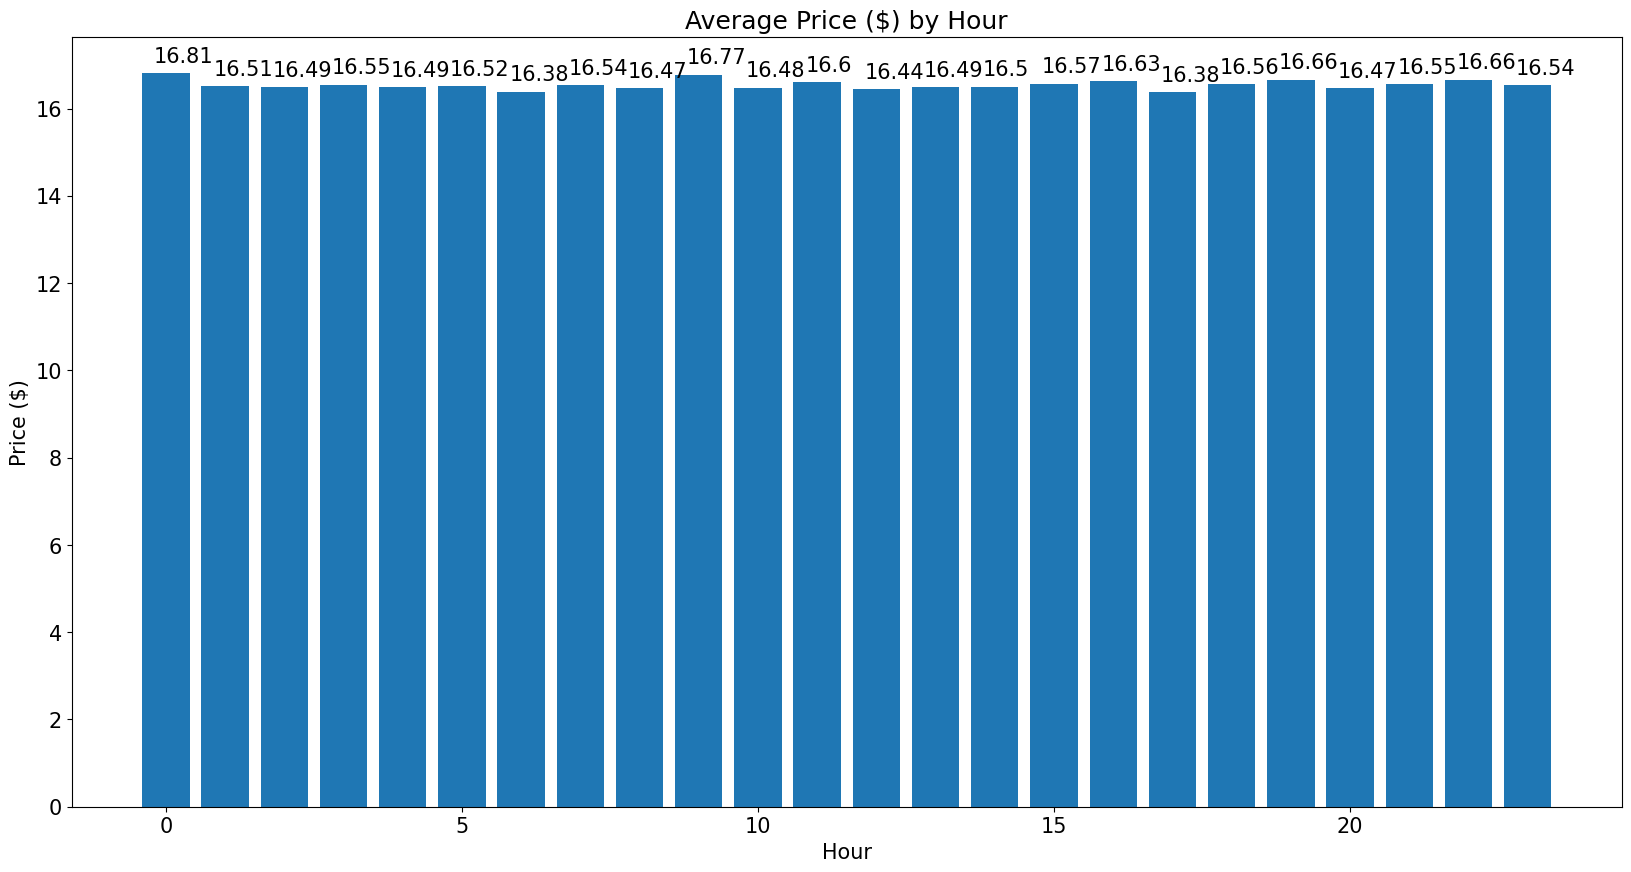

In [32]:
plt.figure(figsize=(20,10))
plt.bar(time_price.index, time_price)

for x, y in enumerate(time_price):
    plt.text(x-0.2, y + .25, str(round(y,2)))
    
plt.title('Average Price ($) by Hour')
plt.xlabel('Hour')
plt.ylabel('Price ($)')

The bar graph above displays the average price of a rideshare during a given hour throughout the day. There does not seem to be any significant trend or change in prices, as they all seem to sit around 16 dollars. There are slight increases in the early morning and before noon but the differences are not large enough to be considered significant. Based on these results, it does not seem likely that time of day has strong influence on pricing.

In [33]:
df.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'day_of_week',
       'month', 'date', 'time_x', 'year', 'time_of_day', 'temp', 'location',
       'clouds', 'pressure', 'rain', 'time_stamp_y', 'humidity', 'wind',
       'time_y', 'hour', 'distance_10', 'price_10', 'temp_10', 'clouds_10',
       'rain_10', 'humidity_10', 'wind_10', 'hour_10'],
      dtype='object')

####  Price vs Temperature

Text(0, 0.5, 'Price')

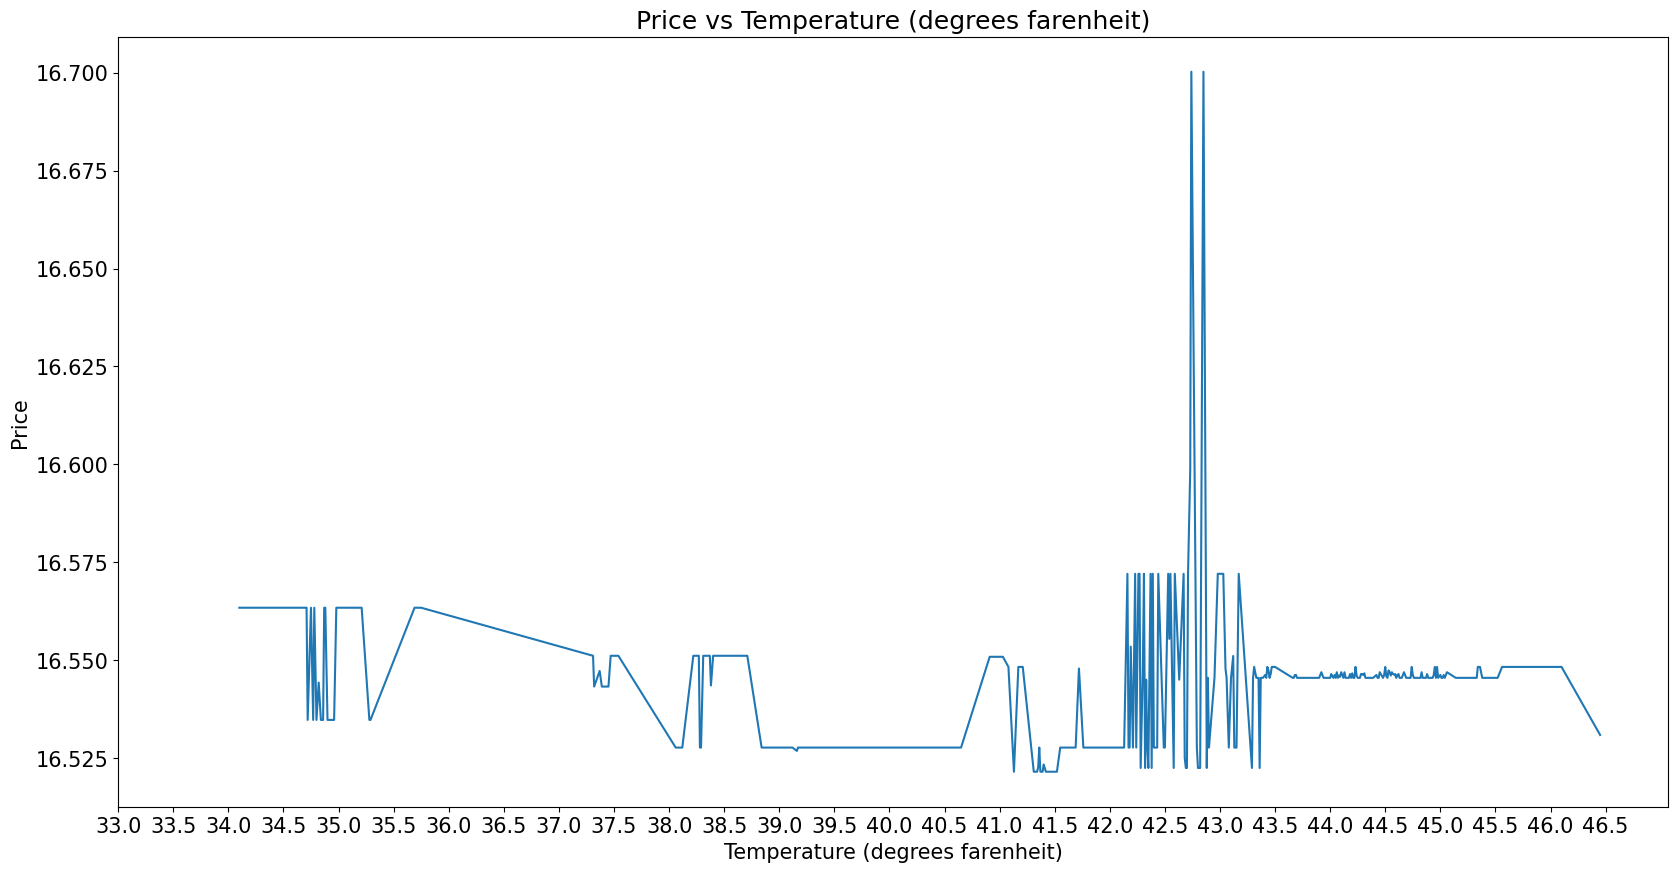

In [34]:
plt.figure(figsize=(20,10))
plt.plot(df.groupby('temp')['price'].mean())
plt.xticks(np.arange(33,47,0.5))
plt.title('Price vs Temperature (degrees farenheit)')
plt.xlabel('Temperature (degrees farenheit)')
plt.ylabel('Price')

According to the lineplot above, it seems that prices sit mainly between 16.50 and 16.60. At around 43 degrees, the price increases to about 16.70. However, it is important to note that this high variability of price at this increment should be taken into consideration along with the fact that the data only records for one week during the winter, so the fluctuation in temperature still stays around cold.

With these graphs and trends in mind, we can now select certain variables to develop a model to predict the price of a given rideshare

# Linear Regression 

To predict the price, we can take the distance, time of day, and climate features and perform multilinear regression using the sklearn module. Since time of day is a categorical variable, we need to transform it so that we can pass in the feature into our linear regressor. To do this, we can one-hot encode "morning" and "evening/night" into 0 and 1.

In [42]:
df['time_of_day'].replace(['morning', 'evening/night'], [0, 1], inplace=True)


Using the train_test_split module from sklearn, we can split the dataset into a 80% training set and 20% test set, so we can train on a training set and predict results on a test set.

In [43]:
X = df[['distance', 'time_of_day', 'temp', 'pressure', 'rain', 'humidity', 'wind']]

In [44]:
y = df['price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred

array([23.30196507, 14.18043418, 13.83905826, ..., 14.26558034,
       17.60454752, 18.9676248 ])

In [47]:
compare = pd.DataFrame()
compare['actual'] = y_test
compare['predicted'] = y_pred
compare.head()

,actual,predicted
22428427,38.0,23.301965
16884766,8.0,14.180434
7888051,8.0,13.839058
1855102,16.0,13.912861
7718063,9.0,17.214868


In [48]:
mean_squared_error(y_test, y_pred)

76.07825436153225

In [49]:
r2_score(y_test, y_pred)

0.11936441178129631

Lets try with distance and price.

In [50]:
X, y = df[['distance']], df['price']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred

array([22.60448073, 14.98622028, 16.40225382, ..., 19.57416895,
       17.42179797, 17.73332535])

In [53]:
compare = pd.DataFrame()
compare['actual'] = y_test
compare['predicted'] = y_pred
compare.head()

,actual,predicted
26496912,22.5,22.604481
26245600,17.0,14.986220
25694731,28.5,16.402254
14257155,27.5,13.286980
9923279,7.5,12.267436


In [55]:
mean_squared_error(y_test, y_pred)

76.22339280198662

In [57]:
r2_score(y_test, y_pred)

0.11897442664274294

Let's try with time of day as a predictor.

In [58]:
X, y = df[['time_of_day']], df['price']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
model3 = LinearRegression()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
y_pred

array([16.54297837, 16.54297837, 16.54297837, ..., 16.51422449,
       16.54297837, 16.51422449])

In [61]:
compare = pd.DataFrame()
compare['actual'] = y_test
compare['predicted'] = y_pred
compare.head()

,actual,predicted
1548703,34.0,16.542978
482535,19.5,16.542978
6710142,9.5,16.542978
13495148,9.5,16.542978
2031901,26.0,16.542978


In [62]:
mean_squared_error(y_test, y_pred)

86.59335904989672

In [63]:
r2_score(y_test, y_pred)

7.647496141904853e-07

Let's try with weather as predictors.

In [64]:
X, y = df[['temp', 'pressure', 'rain', 'humidity', 'wind']], df['price']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
model4 = LinearRegression()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
y_pred

array([16.5168999 , 16.53760472, 16.51784741, ..., 16.53759146,
       16.52085183, 16.52330033])

In [67]:
compare = pd.DataFrame()
compare['actual'] = y_test
compare['predicted'] = y_pred
compare

,actual,predicted
19377417,7.5,16.516900
26717622,15.0,16.537605
177962,9.0,16.517847
10764200,16.5,16.532541
8732246,10.5,16.541475
...,...,...
1148268,64.5,16.544701
2729317,13.5,16.522083
6188174,16.0,16.537591
25005754,27.5,16.520852


In [68]:
mean_squared_error(y_test, y_pred)

86.60468925480949

In [70]:
r2_score(y_test, y_pred)

3.961200679247767e-06

## With Other Variables

In [71]:
#divide cabs dataset to numerical and ordinal columns 
df_num = df[['distance', 'time_of_day', 'price','surge_multiplier', 'temp', 'rain', 'humidity', 'wind']]
df_ord = df[['cab_type','day_of_week','destination','source']]

In [72]:
#apply one hot encoding to ordinal columns 
df_ord = pd.get_dummies(df_ord)

In [73]:
#join numerical and one hot encoded categorical columns back together 
df_regression = pd.concat([df_num,df_ord],axis=1)
df_regression.head()

,distance,time_of_day,price,surge_multiplier,temp,rain,humidity,wind,cab_type_Lyft,cab_type_Uber,...,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,0.44,0,5.0,1.0,42.73,0.007,0.73,9.71,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.44,0,5.0,1.0,42.33,0.013,0.73,9.38,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.44,0,5.0,1.0,42.35,0.008,0.73,9.47,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0.44,0,5.0,1.0,42.38,0.008,0.73,9.50,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.44,0,5.0,1.0,42.35,0.007,0.73,9.48,1,0,...,0,0,0,1,0,0,0,0,0,0


In [74]:
#Defining variables and results
X = df_regression.loc[:, df_regression.columns != 'price']
y = df_regression['price']

In [75]:
#Split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
#Fitting linear regression into set 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [77]:
#Predicting results 
y_pred = regressor.predict(X_test)
y_pred

array([16.50996399, 16.83043289, 15.96549606, ..., 11.48958588,
       16.17257309, 13.07994461])

In [79]:
#put actual price and predicted price into one dataframe to compare
compare = pd.DataFrame()
compare['actual_price'] = y_test
compare['predicted_price'] = y_pred
compare.head()

,actual_price,predicted_price
16783338,22.5,16.509964
4899047,16.5,16.830433
24182711,19.5,15.965496
1950528,8.5,15.033875
15938347,7.0,11.136997


In [80]:
#MSE and R Squared 
MSE = mean_squared_error(compare['actual_price'], compare['predicted_price'])
R = r2_score(compare['actual_price'], compare['predicted_price'])
print(MSE, R)


71.39431844151828 0.174903807477769


# Ethics & Privacy

The dataset we used is publicly sourced from Kaggle, which is an online community for sharing datasets. The data itself is sourced from API queries at regular intervals from Uber and Lyft from select high population-density locations in Boston in 2018 for a week between the end of November and the beginning of December. The data consists of simulated prices for given distances and times throughout 1 week. Thus, our data does not include information about real rides that were taken, but simply rides that were calculated by Uber and Lyft if one were to schedule one. Since our data was sourced through API calls of simulated calculations, we can ignore the possibility of privacy violation (as there were no real consumers involved) and voluntary bias, as the data was not collected through surveys or volunteers. Though the data is ethically sourced, there are some other biases involved in our data. 
	
One of the biases in our data resides in the location from which our data is collected. 
The data is collected from a handful of selected hotspot locations in Boston using the following map (linked below). Thus, this data is not representative of the entire United States, or even the entirety of Boston, but simply certain populated areas that are likely to have high volumes of rideshare traffic. Also, our data was collected for 1 week from the end of November to the beginning of December in 2018. Thus, the data cannot be generalized to represent all of 2018. Because of the specific week selected, there is likely to be a higher volume of rideshares due to holidays and the resulting increase in travel. Our data is also sourced from Uber and Lyft rides only, so our analysis cannot be generalized to represent other smaller rideshare services like Via or Flywheel. However, Uber and Lyft make up a vast majority of ridesharing, so our results still provide significant insight regarding the rideshare industry. Aside from these factors, the data does not discriminate towards any particular type of person or population. With these factors in mind, our analysis aims to simply analyze the relationship between weather and pricing of rideshares for Uber and Lyft, while taking into consideration other possible factors.

https://www.google.com/maps/d/u/0/viewer?mid=1CoeBbhbf59z8EopJGvMJxEe1NNo&ll=42.45357621635435%2C-71.21848534999998&z=10

# Conclusion & Discussion

## Results

Our research question was "How does distance, the time of day, and climate, specifically weather and  temperature affect the prices of Uber and Lyft rides in Boston’s hotspots? Additionally, how can we utilize these variables to predict the prices of Uber and Lyft rides in Boston’s hotspots?"

First we collected the data through kaggle, then we cleaned our data by dropping any observations that contains a null value, in addition to checking and adjusting the datatypes for each column. For linear regression, we kept all columns with numerical datatype as it is and performed one hot encoding for all relevant categorical columns. 

Our results for the research shows that there is a positive correlation between distance and the prices of Uber and Lyft rides in Boston's hotspots. Further analysis shows that other variables, such as weather related information and time of day does not have any correlation with the prices of the rides as it performs worse as predictors compared to only distance. However, ordinal information, such as cab type and day of week in addition to previously mentioned variables perform better than the previous two models, implying that the ordinal information provide some weight into predicting the prices of the Uber and Lyft rides

While the last model performs better than the previous models with a slight improvement, it does not seem significant enough to influence the decision of price. Overall, it seems like distance has the highest weight in determining the price of the rides.

## Limitations of Analysis

As with any data science endeavor, there may be limitations in the project and data itself. The sourced data only includes information for a week in November 2018, so there are not as many varying ranges in terms of weather. This may cause issues with linear regression, as predicting the price of a ride will not be as entirely dependent on weather related variables such as variability in wind, temperature, pressure, and so on. In addition, there are two datasets that needed to be joined, cab data and weather data. Since the data was not joined on a common primary id but instead on features including time of day and day of week, any given cab ride may not have completely accurate information in the resulting joined data table.

# Team Contributions

In [43]:
contrib = pd.DataFrame()
contrib['Tasks'] = ['Overview', 'Research', 'Background and Prior Work',
                   'Hypothesis', 'Datasets', 'Setup/Cleaning', 'Data Visualization',
                   'EDA', 'Linear Regression / Analysis', 'Ethics and Privacy', 'Conclusion & Discussion (Results)',
                   'Conclusion & Discussion (Limitations)']
contrib['Hien'] = ['x','','','','','','x','x','','x','',''] 
contrib['Samantha'] = ['','x','','x','','','x','','','','','']
contrib['Felicia'] = ['','','x','','','','','','x','','','x']
contrib['Jason'] = ['','','','','x','x','','','x','','x',''] 
contrib.set_index('Tasks')
contrib

,Tasks,Hien,Samantha,Felicia,Jason
0,Overview,x,,,
1,Research,,x,,
2,Background and Prior Work,,,x,
3,Hypothesis,,x,,
4,Datasets,,,,x
5,Setup/Cleaning,,,,x
6,Data Visualization,x,x,,
7,EDA,x,,,
8,Linear Regression / Analysis,,,x,x
9,Ethics and Privacy,x,,,
